# Bank Customer Segmentation Capstone Project

## Project Overview:


My goal with this project was to segment a dataset of bank customers into different groups using clustering techniques to better understand their financial behaviors and be able to create appropriate marketing and retention strategies for each segment. By analyzing various customer features such as credit score, balance, tenure, product engagement, and geographic location, I was able to uncover patterns and trends that can help the bank optimize its services.

I grouped the dataset into several clusters based on similar characterisitcs using (K-means clustering). And the analysis revealed unique customer profiles across France, Germany, and Spain, each with some variations in financial stability, engagement levels, and churn risks. This segmentation project shows the bank which customer groups are most likely to stay, which ones need more engagement, and which ones are at risk of leaving.

The ultimate goal of this project was to be able to extract meanigful insights for creating targeted marketing strategies and retention plans that can improve customer satisfaction, enhance product engagement, and reduce churn across different customer segments. 

### Step 1: Importing and Loading the Data

For this project, I will import the data from a CSV file and take a look at the first few rows of it to be able understand the structure of the dataset.

In [115]:
#Importing pandas for EDA
import pandas as pd

#Loading data: 
file_path = 'Bank_Churn.csv' 
data = pd.read_csv(file_path)

#Looking at the first 10 columns of the data set for referece
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Why this step is important:** Loading and inspecting the data is the first step when it comes to understanding the dataset's structure and identifying any potential data issues that may need to be addressed or fixed. 

### Step 2: Keeping a Subset of Relevant Data
To simplify the analysis, I decided to keep only the most relevant columns for clustering and churn prediction. So, I got rid of unnecessary columns like **CustomerId** and **Surname** since they do not contribute to the overall analysis in a meaninful way.

In [119]:
# Creating a pandas dataframe with all fields except CustomerId, Surname, and Exited
data_subset = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

data_subset.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


**Why this step is important:** By focusing on the relevant features, we can make sure that our analysis is based on meaningful data, reducing "noise" or distractions from irrelevant columns.

### Step 3: Data Preprocessing
**Making Text Fields Numeric:**

Here, I'm turning categorical variables like Gender and Geography into a numeric format. I'm doing this is because machine learning models (at least the one I'm working with here), can only process numeric data. So, I will be assigning 0 for male and 1 for female and applying one-hot encoding to Geography.

**Note:** one-hot encoding is a method for converting categorical data into numerical format so that it can be used in machine learning models. 

In [123]:
import numpy as np

#converting 'Gender' to numeric
data_subset.loc[:, 'Gender'] = np.where(data_subset['Gender'] == 'Female', 1, 0)

#one-hot encode for geography
data_clean = pd.get_dummies(data_subset, columns=['Geography'], dtype='int', prefix='', prefix_sep='')

data_clean.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
6,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
8,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,1,0,0


**Note:** Now, when we look at our France, Germany, and Spain columns, we can see that they contain numerical values. In this case, 1 in any of the country columns indicated that the customer in that row is from that country, 0 indicates the opposite.

**Why this step is important:** Encoding categorical variables ensures that the machine learning models can interpret the data correctly, which improves the performance of clustering and prediction algorithms.

### Step 4: Feature Engineering

In this section, I'm creating a new feature called "**ProductsPerYear**". This feature represents the number of products held by a customer in relationship to their tenure (how long they have been customers of the bank). This feature is super useful because it helps us understand how engaged a customer is with the bank's products and services.

In [128]:
#creating new column: ProductsPerYear
data_clean['ProductsPerYear'] = np.where(data_clean.Tenure == 0, data_clean.NumOfProducts, data_clean.NumOfProducts / data_clean.Tenure)

#looking at the results for reference
data_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.508523
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.507921
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.100000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.200000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.333333
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,0.666667
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,4.000000


**Why this step is important:** This new feature (ProductsPerYear) gives us valuable insights into customer behavior, including how often they engage with the bank’s products, which can influence marketing strategies, etc.

### Step 5: Scaling the Data

Clustering algorithms like K-means are sensitive to the scale of the data; thats's why I'm scaling the features to standarize their range. By doing this we make sure that all features contribute equally to the whole clustering process. 

In [132]:
from sklearn.preprocessing import StandardScaler

#scaling data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns=data_clean.columns)

df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,-0.016781


**Why this step is important:** Feature scaling prevents some features from dominating the clustering process due to their larger numerical range (for example, things like balance), ensuring the algorithm treats all features equally and so on.

### Step 6: Clustering with K-Means

Here, I decide to use the elbow method to figure out how many clusters (groups) I need to create for the analysis. This method is very useful for choosing the best or most appropriate number of clusters. After that, I will apply K-means clustering to segment the customers. 

**Note:** 
- The elbow method works by identifying the point where adding more clusters no longer significantly improves grouping (we can see this at the "elbow" area of the graph).  
- K-means clustering is used to divide the customers into groups based on similarities in their data. 

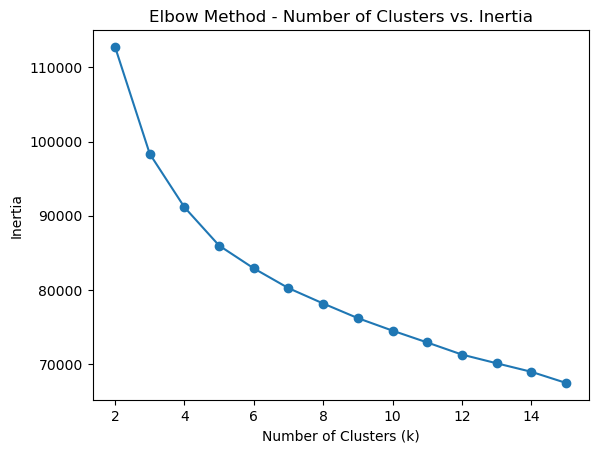

Counter({3: 2343, 2: 2336, 4: 2329, 1: 2305, 0: 687})


In [136]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#elbow method to determine the best number of clusters to use
inertia_values = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

#plotting the inertia values
plt.plot(range(2, 16), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Number of Clusters vs. Inertia')
plt.show()

#applying KMeans with 5 clusters (based on the elbow method)
kmeans5 = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans5.fit(df_scaled)

#displaying the number of customers in each cluster
from collections import Counter
print(Counter(kmeans5.labels_))

**Explanation & Interpretation:** In terms of how the elbow method works when choosing the appropriate number of clusters, we typically choose our clusters at the elbow point of the graph. This is where the inertia starts to level off ( inertia refers to how well the data points fit within their assigned clusters). In this case, 5 clusters seem to be appropriate since adding more clusters would not significantly improve the model's overall performance (starting at index 0). In this case, using 5 clusters will be the best option for balancing the granularity of the segmentation with the model's ability to generalize. 

**Why this step is important:** The **elbow method** helps us pick the appropriate number of clusters for our analysis, ensuring that the segmentation is meaningful and impactful. **K-means clustering** then segments the customers into groups with similar behaviors, which deepens our analysis and can be used for developing targeted marketing strategies.

### Step 7: Analyzing Cluster Centers

Now that we have our customer clusters, we can visualize these clusters in order to understand the profile of each group.

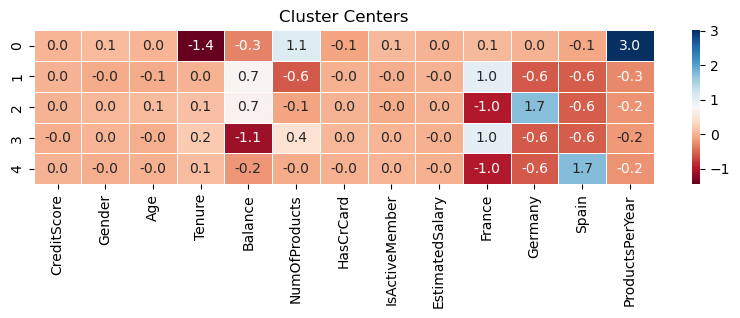

In [140]:
#creating heatmap viz of the cluster centers
import seaborn as sns

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=df_scaled.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers5, annot=True, cmap='RdBu', fmt='.1f', linewidths=.5)
plt.title('Cluster Centers')
plt.show()

**Interpretation:** Our heatmap above shows us important customer profiles across clusters (with regional variations). 

When it comes to **Cluster 0**, we can see that customers in this cluster have (low balance, and very high product engagement), suggesting low financial stability, but high service usage. Moreover, most of the customers from Cluster 0 come from France and Spain. This group also consumes many products in a short time,  making them ideal candidates for loyalty-based incentives to improve retention and financial guidance tools to improve financial stability.

On the other hand, **Cluster 1** consists of customers with (relatively high balance but low product comsumptiom). The behaviors observed in Cluster 1 are more common in France, showing low product exploration despite high account balance. Targeted strategies like premium financial offerings and investment portfolio recommendations could encourage them to engage more.

Additionally, we see that the common behavior of **Cluster 2** is (high balance and low product comsumptiom), containing German customers mainly.This group represents stable customers who seem to prioritize savings. Tailoring high-end financial services and selling investment options could make them engage more.


**Cluster 3** consists of (low balance and moderate product comsumption). This chunk is dominated by French customers with more products but low balance. They are active but seem financially constrained - making them good candidates for structured financial education programs, flexible savings plans, or entry level credit card offers.
  

Lastly, **Cluster 4** is dominated by Spanish customers with (low balance and low product compsumption). This group is at high risk of churn, requiring retention campaigns and personalized engagement strategies to maintain their connection with the bank.

**Why this step is important:** Visualizing the cluster centers can help us understand the key characteristics or behaviors of each cluster, which is essential for making recommendations and creating tageted marketing strategies.

### Step 8: Analyzing Geography Breakdown for Each Cluster

Before making recommendations, I wanted to take the analysis a step further and examine the geographic distribution of customers within each cluster. I thought this could be a great addition to the project because it can provide valuable insights into regional trends and help tailor strategies to specific countries. 

In [144]:
#grouping by geography and calculating mean
data_geo = data_subset.copy()
data_geo.Gender = np.where(data_geo.Gender == 'Female', 1, 0)

#quick look at geographic breakdown
data_geo.groupby('Geography').mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,649.668329,0.0,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814
Germany,651.453567,0.0,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102
Spain,651.333872,0.0,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281


**Interpretation:**

Looking at the results, we can see that credit scores across the counties we have (France, Germany, and Spain), are very similar - showing little variation. 

The account balance for customers in Germany (at 119,730) is slightly higher compared to the balance of customers from France (at 62,092) and Spain (at 61,092). This indicates that German customers generally hold higher account balances.  

I took a look at the (number of products) and (tenure) across countries and the results appear fairly similar with only slight differences. This suggests that customer engagement levels and longevity in the banking relationship are consistent across Germany, France, and Spain. 


Overall, while there are small differences in balances across these countries, the overall customer profiles are very similar. However, understading the balance differences in Germany can help us create more specific financial offerings to this group. For instance, based on their balance, we could offer German customers premium services or investement advice, while other regions can be targeted with products that encourage higher engagemet and loyalty.

**Why this step is important:** Understanding the geographic breakdown can help us see customer behavior variations by region, which can help us create tailor services for specific markets.

### Step 8: Making Recommendations

**Cluster 0:** These customers have low balances but a lot of products (France & Spain).

- **Recommendations:**
    - Implement reward programs for consistent engagement.
    - Offer bundled product discounts to encourage continued usage
    - Provide budgeting tools and financial advisory sessions to support stability
 

**Cluster 1:** This group have high balances but low product consumption (France)

- **Recommendations:**
    - Develop exclusive investment options tailored to their financial profile.
    - Promote high-value savings plans to encourage diversification and service usage.
    - Offer priority banking perks to foster a deeper relationship with the bank.


**Cluster 2:** These customers have high balances but low product consumption (Germany)
- **Recommendations:**
    - Provide customized financial plans to maximize savings efficiency.
    - Cross-sell investment products like wealth management portfolios.
    - Introduce premium banking services for high-value customers.

**Cluster 3:** These cluster consists of customers with low balances and moderate product engagement (France)

- **Recommendations:**
    - Offer financial literacy workshops to educate on money management or smart spending.
    - Provide low-risk credit-building options to improve financial status. 
    - Encourage long-term savings plans with progressive incentives to improve their financial stability and forter retention. 


**Cluster 4:** Customers in this cluster have low balances with low product consumption (Spain) - high churn risk

- **Recommendations:**
    - Introduce retention-focused discounts or no-fee accounts to boost loyalty.
    - Provide personalized financial guidance to address concerns and improve engagement.
    - Create targeted outreach strategies, such as special promotions or referral incentives.

### Conclusion

This project showcases my analytical skills and workflow through customer segmentation of a bank’s clientele across Germany, France, and Spain. By applying K-means clustering, I identified five distinct customer profiles based on variables like balance, product engagement, credit score, and geographic location. These clusters revealed meaningful behavioral patterns, enabling data-driven recommendations to support more tailored marketing and retention strategies.

With these insights, the bank can enhance customer retention and deliver a more personalized experience—fostering stronger, longer-lasting relationships.

### References:

The dataset for this project was sourced from **Maven Analytics**, a platform dedicated to helping professionals build analytical skills through real-world data challenges.